In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

# Data Exploration

In [6]:
heart_pr = pd.read_csv("heart_disease_restaurant.csv")
heart_pr.drop("Unnamed: 0", axis=1, inplace=True)
display(heart_pr.head())
display(heart_pr.info())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population,Population Group,Restaurant Group
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000,2.0,NaN,NaN,NaN,NaN
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0,20000-40000,0-7
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0,<20000,0-7
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,1.0,21737.0,11611.0,<20000,0-7
4,1108,23.351695,29.923640,34.742488,33.123923,35.242800,12.185663,6.873862,2.0,34064.0,26688.0,20000-40000,0-7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4796 entries, 0 to 4795
Data columns (total 13 columns):
Zip Code                    4796 non-null int64
Smoking Prevalence          4796 non-null float64
Hypertension Prevalence     4796 non-null float64
Obesity Prevalence          4796 non-null float64
Sedentarism Prevalence      4796 non-null float64
Cholesterol Prevalence      4796 non-null float64
Diabetes Prevalence         4796 non-null float64
Heart Disease Prevalence    4796 non-null float64
Restaurant Count            4796 non-null float64
median_household_income     4400 non-null float64
Population                  4400 non-null float64
Population Group            4400 non-null object
Restaurant Group            4034 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 487.2+ KB


None

# Features correlations

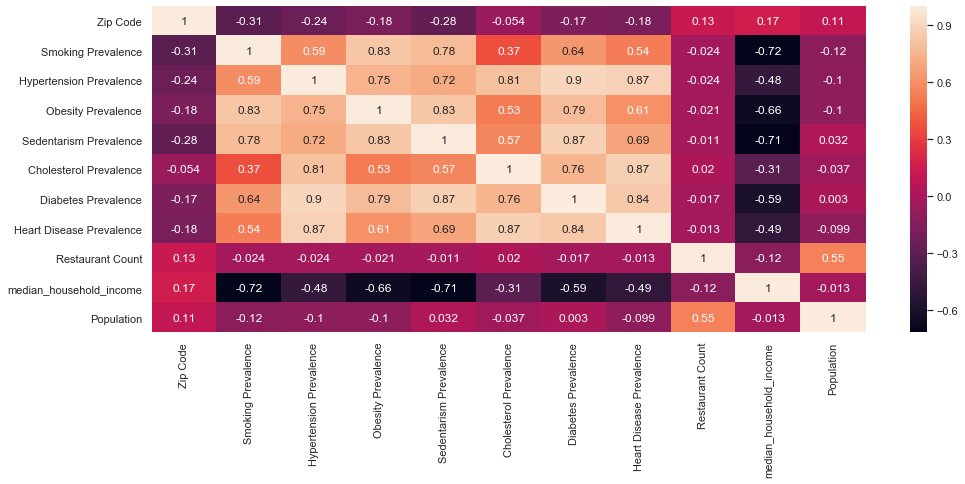

In [14]:
plt.figure(figsize=(16, 6))
sns.heatmap(heart_pr.corr(), annot = True)

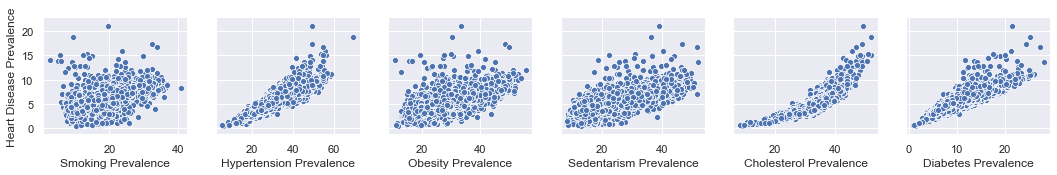

In [12]:
sns.pairplot(heart_pr,y_vars = ["Heart Disease Prevalence"],x_vars = ["Smoking Prevalence", "Hypertension Prevalence", "Obesity Prevalence", "Sedentarism Prevalence", 
                              "Cholesterol Prevalence","Diabetes Prevalence"])

# Features with positive correlations

As we can interpret from above HEATMAP that smoking, hypertension, obesity, sedentarism, high cholesterol, and diabetes are positively correlated with heart disease prevalence. We will explore for the above features using joint plots.

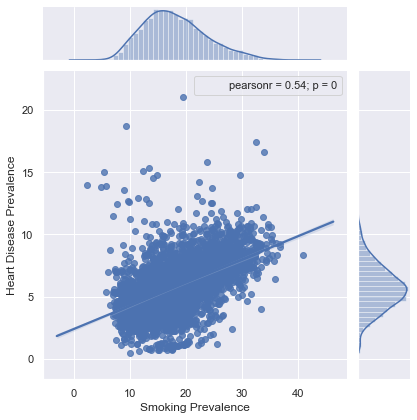

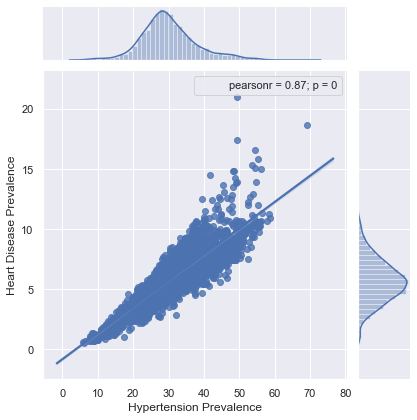

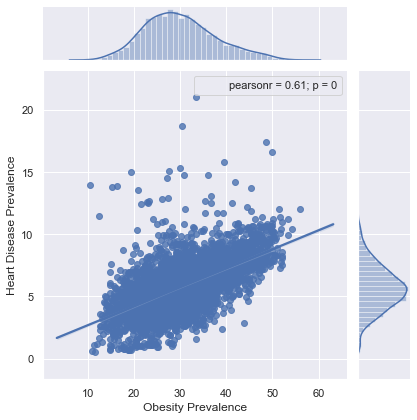

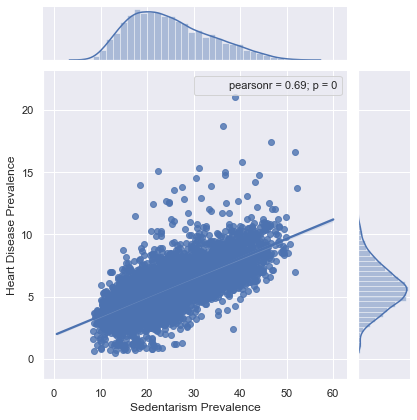

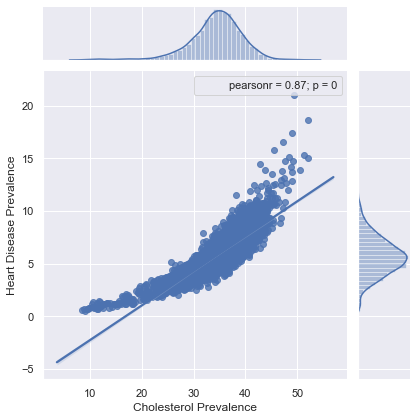

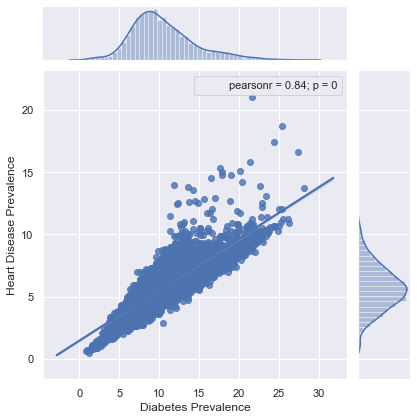

In [17]:
sns.jointplot("Smoking Prevalence","Heart Disease Prevalence",data=heart_pr,kind="reg")
plt.show()

sns.jointplot("Hypertension Prevalence","Heart Disease Prevalence",data=heart_pr,kind="reg")
plt.show()

sns.jointplot("Obesity Prevalence","Heart Disease Prevalence",data=heart_pr,kind="reg")
plt.show()

sns.jointplot("Sedentarism Prevalence","Heart Disease Prevalence",data=heart_pr,kind="reg")
plt.show()

sns.jointplot("Cholesterol Prevalence","Heart Disease Prevalence",data=heart_pr,kind="reg")
plt.show()

sns.jointplot("Diabetes Prevalence","Heart Disease Prevalence",data=heart_pr,kind="reg")
plt.show()

From the joint plots it can be seen that these risk factors are strongly and linearly correlated with heart disease prevalence. Hypertension, high cholesterol and diabetes have the strongest correlations.

# Correlation Between Household income and Heart Disease

As per the Heatmap we can interpret that household income have negative correlation. We can interpret more with joint plot.

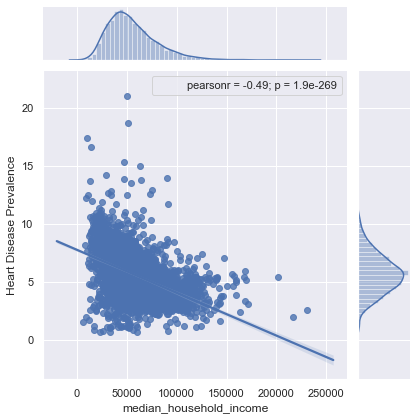

In [19]:
sns.jointplot("median_household_income","Heart Disease Prevalence",data=heart_pr,kind="reg",stat_func=stats.pearsonr)
plt.show()

We can see that household income plays negative role in Heart disease. It looks like that people with high income have less chance of having heart disease as they can access to healthcare.

Income distribution:

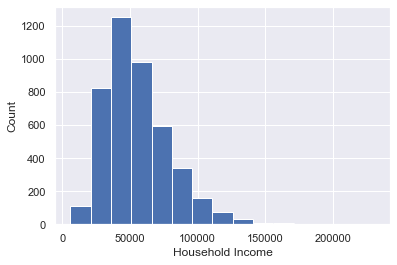

In [29]:
plt.hist(heart_pr['median_household_income'],bins=15)
plt.xlabel('Household Income')
plt.ylabel('Count')
plt.show()

Majority population income falls on or below 50000

###### Dividing the income in 2 groups:

In [45]:
len(heartpr_copy)
len(incgrp)


4034

In [48]:
heartpr_copy = heart_pr.dropna()
incgrp = []
for x in heartpr_copy['median_household_income']:
    if(x < 50000):
        incgrp.append("<50000")
    if(x >= 50000):
        incgrp.append(">=50000")
        
heartpr_copy['Income Group'] = incgrp


##### Checking if income groups have any affect on Heart disease

In [57]:
heartpr_copy.groupby('Income Group')['Heart Disease Prevalence'].mean().reset_index()

,Income Group,Heart Disease Prevalence
0,<50000,6.572665
1,>=50000,4.976716


###### we interpret that with low income the heart disease is large

# Correlation Between Population and Heart Disease

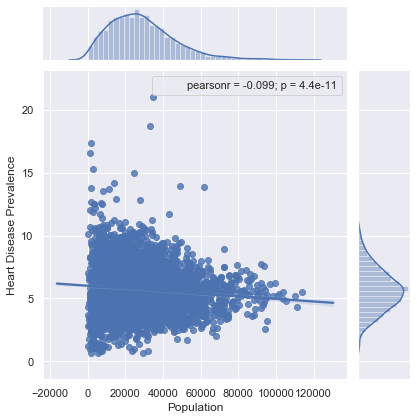

In [21]:
sns.jointplot("Population","Heart Disease Prevalence",data=heart_pr,kind="reg",stat_func=stats.pearsonr)
plt.show()

There is a negative or weak correlation between the population and heart disease.


### Heart disease and restaurant count

##### Is the number of fast food restaurants within a zip code correlated to heart disease?

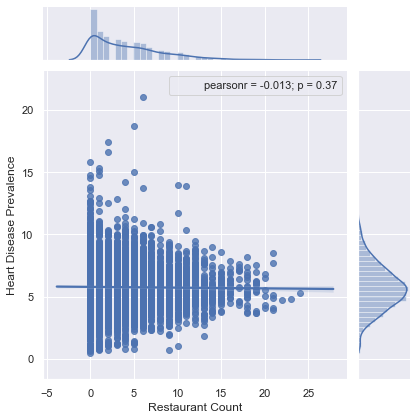

In [55]:
sns.jointplot("Restaurant Count","Heart Disease Prevalence",data=heart_pr,kind="reg",stat_func=stats.pearsonr)
plt.show()

###### From the plot we see that when viewing all zip codes, there is likely no correlation between a zip code's restaurant count and its heart disease prevalence.

In [56]:
# Export to file
export_csv = heartpr_copy.to_csv('heart_disease.csv', header=True)